In [1]:
import cv2
import face_detection
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from glob import glob
from os import path
from PIL import Image
from tqdm import tqdm

print(face_detection.available_detectors)
detector = face_detection.build_detector(
  "RetinaNetMobileNetV1", confidence_threshold=.5, nms_iou_threshold=.3)
# BGR to RGB
im = cv2.imread("../course_work/VGAF/Train_Frames/97_4_frame4.jpg")[:, :, ::-1]

detections = detector.detect(im)

/home/lev/anaconda3/envs/course_work/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


['DSFDDetector', 'RetinaNetResNet50', 'RetinaNetMobileNetV1']


In [2]:
im.shape

(720, 1280, 3)

In [3]:
detections[1][:4]

array([1176.7476 ,  377.96423, 1208.3605 ,  417.5434 ], dtype=float32)

In [4]:
detections[1][:4][2]

1208.3605

In [5]:
detections[1][:4][0]

1176.7476

In [6]:
detections[1][:4][3]

417.5434

In [7]:
detections[1][:4][1]

377.96423

In [8]:
(detections[1][:4][2]-detections[1][:4][0]) * (detections[1][:4][3]-detections[1][:4][1])

1251.2126

In [9]:
len(detections)

9

In [10]:
bboxes = []
for a in range(len(detections)):
    if ((detections[a][:4][2]-detections[a][:4][0]) * (detections[a][:4][3]-detections[a][:4][1]))<250:
        pass
    else:
        bboxes.append(detections[a][:4])        

In [11]:
bboxes

[array([1078.2292 ,  390.08948, 1107.1003 ,  424.9644 ], dtype=float32),
 array([1176.7476 ,  377.96423, 1208.3605 ,  417.5434 ], dtype=float32),
 array([796.93445, 382.878  , 819.641  , 415.1095 ], dtype=float32),
 array([455.2105 , 190.97298, 479.57016, 224.0784 ], dtype=float32),
 array([1072.3638 ,  207.97519, 1093.0068 ,  232.92938], dtype=float32),
 array([588.5768 , 253.54892, 626.4051 , 307.04767], dtype=float32),
 array([1038.3384 ,  225.05344, 1059.4851 ,  253.08629], dtype=float32),
 array([687.11304, 227.71906, 725.94116, 274.39655], dtype=float32),
 array([203.76288, 215.5592 , 223.78491, 243.61104], dtype=float32)]

In [12]:
from PIL import Image
img = Image.open("../course_work/VGAF/Train_Frames/97_4_frame4.jpg")

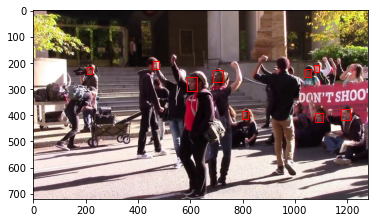

In [13]:
fig,ax = plt.subplots(1)
ax.imshow(img)
for bbox in bboxes:
    rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2]-bbox[0],bbox[3]-bbox[1],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
ax.add_patch(rect)

In [36]:
TRAIN_DIR = "../course_work/VGAF/Train_Frames/"
CROPPED_TRAIN_DIR = "../course_work/VGAF/Cropped_Train_Images/"
train_data = pd.read_csv("../course_work/VGAF/txt_files/train_data.csv")

In [37]:
images = glob("../course_work/VGAF/Train_Frames/*.jpg")
array = []
for i in range(len(images)):
    array.append(Image.open(images[i]).size)

In [99]:
# IMAGE_SIZE = (256, 256)
# images = glob("../course_work/VGAF/Train_Frames/*.jpg")
# array = []
# for i in range(len(images)):
#     resized_image = Image.open(images[i]).resize(IMAGE_SIZE)
#     resized_image.save("../course_work/VGAF/" + "Cropped_Train_Images/" + images[i].split("/")[4])

In [38]:
len(array)

14694

In [39]:
array_unique = list(set(array))
array_unique

[(1276, 720),
 (204, 360),
 (490, 360),
 (326, 240),
 (1280, 720),
 (406, 720),
 (640, 350),
 (640, 356),
 (480, 270),
 (492, 360),
 (626, 360),
 (640, 352),
 (608, 1080),
 (636, 360),
 (320, 240),
 (400, 300),
 (480, 360),
 (400, 260),
 (640, 360),
 (400, 226)]

In [40]:
len(array_unique)

20

In [56]:
small_images = [(204, 360), (490, 360), (326, 240),(406, 720),
 (480, 270), (492, 360), (320, 240), (400, 300), (480, 360),
 (400, 260),(400, 226)]
normal_images = [(1276, 720),(1280, 720),(608, 1080),(626, 360),
                 (640, 352),(636, 360),(640, 350), (640, 356),(640, 360)]

In [57]:
counter = 0
for i in range(len(images)):
    if Image.open(images[i]).size in small_images:
        counter += 1

In [58]:
counter

942

In [59]:
counter = 0
for i in range(len(images)):
    if Image.open(images[i]).size in normal_images:
        counter += 1

In [60]:
counter

13752

In [108]:
train_data

,image,label
0,6_46_frame0.jpg,2
1,97_4_frame4.jpg,3
2,97_14_frame4.jpg,3
3,324_113_frame3.jpg,2
4,101_17_frame3.jpg,1
...,...,...
14689,273_6_frame4.jpg,2
14690,13_25_frame5.jpg,1
14691,37_37_frame4.jpg,2
14692,75_7_frame0.jpg,1


In [110]:
train_data[train_data.image=="6_46_frame0.jpg"]

,image,label
0,6_46_frame0.jpg,2


In [111]:
train_data.iloc[1]

image    97_4_frame4.jpg
label                  3
Name: 1, dtype: object

In [44]:
torch.cuda.is_available()

True

In [14]:
def plot_image_examples(df, rows=3, cols=3, title='Image examples'):
    fig, axs = plt.subplots(rows, cols, figsize=(10,10))
    for row in range(rows):
        for col in range(cols):
            idx = np.random.randint(len(df), size=1)[0]
            img_id = df.iloc[idx].image
            
            img = plt.imread(TRAIN_DIR + img_id)
            axs[row, col].imshow(img)
            
            bboxes = []       
            im = cv2.imread(TRAIN_DIR + img_id)
            if img.size in small_images:                
                detector = face_detection.build_detector(
                "DSFDDetector", confidence_threshold=.6, nms_iou_threshold=.1)
                detections = detector.detect(im)
                for a in range(len(detections)):
#                     if ((detections[a][:4][2]-detections[a][:4][0]) * (detections[a][:4][3]-detections[a][:4][1]))<: 
#                         pass
#                     else:
                    bboxes.append(detections[a][:4])
            else:
                detector = face_detection.build_detector(
                "RetinaNetResNet50", confidence_threshold=.6, nms_iou_threshold=.1)
                detections = detector.detect(im)
                for a in range(len(detections)):
                    bboxes.append(detections[a][:4])
            
            
            for bbox in bboxes:
                rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2]-bbox[0],bbox[3]-bbox[1],linewidth=1,edgecolor='r',facecolor='none')
                axs[row, col].add_patch(rect)
            
            axs[row, col].axis('off')
            
    plt.suptitle(title)

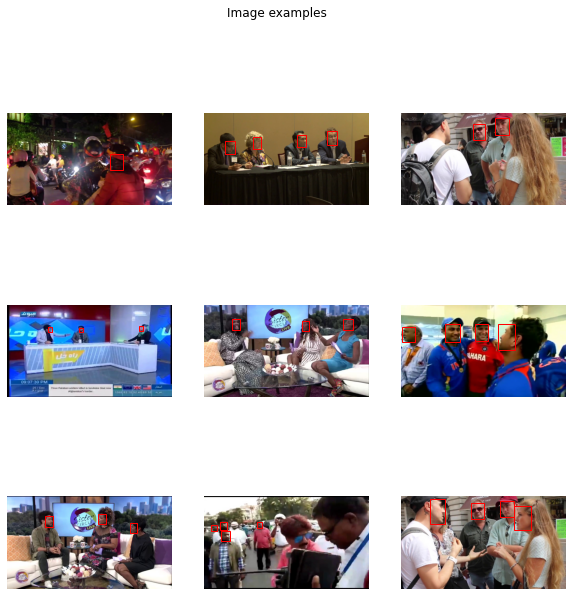

In [114]:
plot_image_examples(train_data)

(1280, 720)


ValueError: zero-size array to reduction operation minimum which has no identity

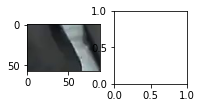

In [115]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle

# draw each face separately
def draw_faces(filename,faces):
    # load the image
    bboxes = []
    data = plt.imread(filename)
    for ii in range(len(faces)):
        bboxes.append(faces[ii][:4])
    #print(bboxes)
    # plot each face as a subplot
    for i in range(len(faces)):
        # define subplot
        plt.subplot(1, len(faces), i+1)
        
        xmin, ymin, xmax, ymax = bboxes[i]
        # plot face
        #print(bboxes)
        #print(xmin)
#         print((int(bboxes[i][0])))
#         print((int(bboxes[i][1])))
#         print((int(bboxes[i][2])))
#         print((int(bboxes[i][3])))
        #print((bboxes[1]))
        #print((bboxes[2]))
        #print((bboxes[3]))
        pyplot.imshow(data[int(xmin):int(xmax),int(ymin):int(ymax)])
    # show the plot
    pyplot.show()

filename = "../course_work/VGAF/Validation_Frames/11_1_frame0.jpg"
# load image from file
im = plt.imread(filename)
print(Image.open("../course_work/VGAF/Validation_Frames/11_1_frame0.jpg").size)
#plt.imshow(im)
# create the detector, using default weights
detector = face_detection.build_detector(
                "RetinaNetMobileNetV1", confidence_threshold=.5, nms_iou_threshold=.1)
# detect faces in the image
faces = detector.detect(im)
#print(faces)
# display faces on the original image
draw_faces(filename, faces)

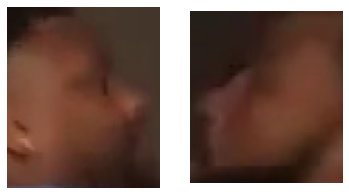

In [50]:
# extract and plot each detected face in a photograp


# draw each face separately
def draw_faces(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot each face as a subplot
    bboxs = []
    data = plt.imread(filename)
    for ii in range(len(faces)):
        bboxs.append(faces[ii][:4])
    for i in range(len(result_list)):
        # get coordinates
        xmin, ymin, xmax, ymax = bboxs[i]
        # define subplot
        plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        # plot face
        plt.imshow(data[int(ymin):int(ymax), int(xmin):int(xmax)])
    # show the plot
    plt.show()

    
idx = np.random.randint(len(train_data), size=1)[0]
img_id = train_data.iloc[idx].image

filename = TRAIN_DIR + img_id
# load image from file
pixels = cv2.imread(filename)[:, :, ::-1]
# create the detector, using default weights
if pixels.size in small_images:                
    detector = face_detection.build_detector(
    "DSFDDetector", confidence_threshold=.6, nms_iou_threshold=.1)
else:
    detector = face_detection.build_detector(
    "RetinaNetResNet50", confidence_threshold=.6, nms_iou_threshold=.1)
# detect faces in the image
faces = detector.detect(pixels)
# display faces on the original image
draw_faces(filename, faces)

In [46]:
len(train_data)

14694

In [47]:
faces = []
for i in tqdm(range(len(train_data))):
    detections = []
    im = cv2.imread(TRAIN_DIR + train_data.iloc[i].image)[:, :, ::-1]
    if im.size in small_images:                
        detector = face_detection.build_detector(
        "DSFDDetector", confidence_threshold=.6, nms_iou_threshold=.1)
        detections = detector.detect(im)
        for a in range(len(detections)):
            faces.append(detections[a][:4])
    else:
        detector = face_detection.build_detector(
        "RetinaNetResNet50", confidence_threshold=.6, nms_iou_threshold=.1)
        detections = detector.detect(im)
        for a in range(len(detections)):
            faces.append(detections[a][:4])            

100%|██████████| 14694/14694 [2:58:42<00:00,  1.37it/s]  


In [48]:
len(faces) #93086 faces detected
# DSFDDetector and RetinaNetResNet50
# time is 2:58:42. YES, I could use %%time but whatever

93086

In [119]:
train_data.iloc[1].image

'97_4_frame4.jpg'

In [120]:
faces

[array([1136.8798  ,   70.829414, 1268.7987  ,  257.73605 ], dtype=float32),
 array([514.9735 , 149.57343, 657.392  , 329.70975], dtype=float32),
 array([1177.8413 ,  378.62943, 1208.3093 ,  417.2112 ], dtype=float32),
 array([1078.2823 ,  390.3825 , 1105.7437 ,  425.10678], dtype=float32),
 array([593.2241 , 251.66635, 629.7535 , 306.4297 ], dtype=float32),
 array([ 991.53326,  360.3672 , 1016.96533,  392.94925], dtype=float32),
 array([798.27637, 381.65005, 819.19434, 412.1132 ], dtype=float32),
 array([1073.144  ,  207.92249, 1092.7147 ,  232.66808], dtype=float32),
 array([1037.9421 ,  223.67006, 1058.7247 ,  252.21245], dtype=float32),
 array([452.3372 , 188.66809, 478.3299 , 225.98495], dtype=float32),
 array([204.06465, 215.29617, 224.25854, 243.94243], dtype=float32),
 array([326.7889 , 176.39685, 525.98883, 427.70248], dtype=float32),
 array([348.19366 , 121.386566, 397.4432  , 185.17662 ], dtype=float32),
 array([892.725  , 127.83657, 976.89404, 232.52322], dtype=float32),
 a

In [47]:
frames_train_dir = "../course_work/VGAF/Train_Frames/"
train_frames_to_face = [frames_train_dir + x for x in os.listdir(frames_train_dir)]

In [64]:
type(train_frames_to_face)

list

In [76]:
import concurrent.futures
import os

In [77]:
global faces 
faces = []


def face_detect(images):
    detections = []
    im = cv2.imread(images)[:, :, ::-1]
    if im.size in small_images:                
        detector = face_detection.build_detector(
        "DSFDDetector", confidence_threshold=.6, nms_iou_threshold=.1)
        detections = detector.detect(im)
        for a in range(len(detections)):
            faces.append(detections[a][:4])
    else:
        detector = face_detection.build_detector(
        "RetinaNetResNet50", confidence_threshold=.6, nms_iou_threshold=.1)
        detections = detector.detect(im)
        for a in range(len(detections)):
            faces.append(detections[a][:4])

In [78]:
def run_function(images):
    return face_detect(images)

In [79]:
with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
    result = executor.map(run_function,train_frames_to_face)

In [81]:
faces

[]